In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load

RANDOM_STATE = 2
random.seed(RANDOM_STATE)

prefix = "../results/"

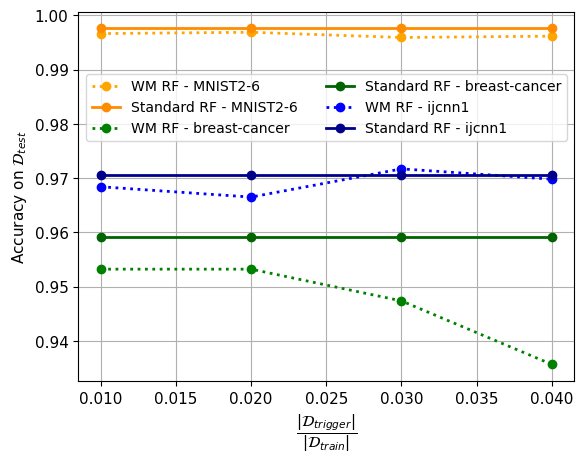

In [26]:
report_acc_x_trigger_dim_loaded_mnist = pd.read_csv(prefix + "report_acc_x_trigger_dim_mnist.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_mnist = pd.read_csv(prefix + "report_acc_standard_x_trigger_dim_mnist.csv", header=None)

report_acc_x_trigger_dim_loaded_breast = pd.read_csv(prefix + "report_acc_x_trigger_dim_breast.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_breast = pd.read_csv(prefix + "report_acc_standard_x_trigger_dim_breast.csv", header=None)

report_acc_x_trigger_dim_loaded_ijcnn1 = pd.read_csv(prefix + "report_acc_x_trigger_dim_ijcnn123.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_ijcnn1 = pd.read_csv(prefix + "report_acc_standard_x_trigger_dim_ijcnn123.csv", header=None)

fig, ax = plt.subplots()
ax.plot(report_acc_x_trigger_dim_loaded_mnist.iloc[0, :], report_acc_x_trigger_dim_loaded_mnist.iloc[1, :], "o:", label="WM RF - MNIST2-6", color="orange", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_mnist.iloc[0, :], report_acc_standard_x_trigger_dim_loaded_mnist.iloc[1, :], "o-", label="Standard RF - MNIST2-6", color="darkorange", linewidth=2)
ax.plot(report_acc_x_trigger_dim_loaded_breast.iloc[0, :], report_acc_x_trigger_dim_loaded_breast.iloc[1, :], "o:", label="WM RF - breast-cancer", color="green", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_breast.iloc[0, :], report_acc_standard_x_trigger_dim_loaded_breast.iloc[1, :], "o-", label="Standard RF - breast-cancer", color="darkgreen", linewidth=2)
ax.plot(report_acc_x_trigger_dim_loaded_ijcnn1.iloc[0, :], report_acc_x_trigger_dim_loaded_ijcnn1.iloc[1, :], "o:", label="WM RF - ijcnn1", color="blue", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_ijcnn1.iloc[0, :], report_acc_standard_x_trigger_dim_loaded_ijcnn1.iloc[1, :], "o-", label="Standard RF - ijcnn1", color="darkblue", linewidth=2)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

ax.set_ylabel("Accuracy on $\mathcal{D}_{test}$", fontsize=11)
ax.set_xlabel("$\dfrac{|\mathcal{D}_{trigger}|}{|\mathcal{D}_{train}|}$", fontsize=11)
ax.grid()
ax.legend(ncol=2, fontsize=10.1, bbox_to_anchor=(1, 0.85))
#plt.show()
plt.savefig(prefix + "accuracies_trigger_set_dimension.pdf", bbox_inches="tight")
plt.savefig(prefix + "accuracies_trigger_set_dimension.png", bbox_inches="tight")

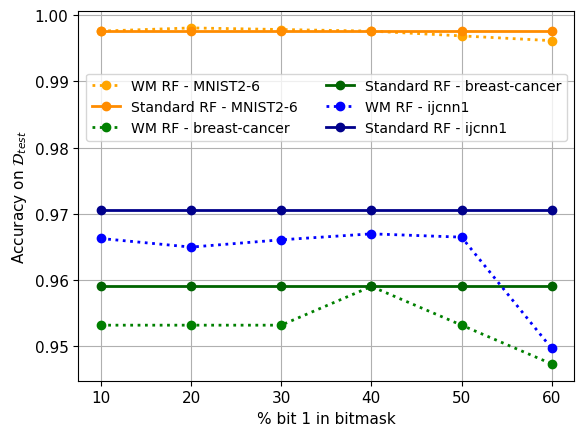

In [4]:
prefix = "../results/"
report_acc_x_trigger_dim_loaded_mnist = pd.read_csv(prefix + "report_acc_x_perc_bit_1_mnist.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_mnist = pd.read_csv(prefix + "report_acc_standard_x_perc_bit_1_mnist.csv", header=None)

report_acc_x_trigger_dim_loaded_breast = pd.read_csv(prefix + "report_acc_x_perc_bit_1_breast.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_breast = pd.read_csv(prefix + "report_acc_standard_x_perc_bit_1_breast.csv", header=None)

report_acc_x_trigger_dim_loaded_ijcnn1 = pd.read_csv(prefix + "report_acc_x_perc_bit_1_ijcnn123.csv", header=None)
report_acc_standard_x_trigger_dim_loaded_ijcnn1 = pd.read_csv(prefix + "report_acc_standard_x_perc_bit_1_ijcnn123.csv", header=None)

fig, ax = plt.subplots()
ax.plot(report_acc_x_trigger_dim_loaded_mnist.iloc[0, :]*100, report_acc_x_trigger_dim_loaded_mnist.iloc[1, :], "o:", label="WM RF - MNIST2-6", color="orange", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_mnist.iloc[0, :]*100, report_acc_standard_x_trigger_dim_loaded_mnist.iloc[1, :], "o-", label="Standard RF - MNIST2-6", color="darkorange", linewidth=2)
ax.plot(report_acc_x_trigger_dim_loaded_breast.iloc[0, :]*100, report_acc_x_trigger_dim_loaded_breast.iloc[1, :], "o:", label="WM RF - breast-cancer", color="green", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_breast.iloc[0, :]*100, report_acc_standard_x_trigger_dim_loaded_breast.iloc[1, :], "o-", label="Standard RF - breast-cancer", color="darkgreen", linewidth=2)
ax.plot(report_acc_x_trigger_dim_loaded_ijcnn1.iloc[0, :]*100, report_acc_x_trigger_dim_loaded_ijcnn1.iloc[1, :], "o:", label="WM RF - ijcnn1", color="blue", linewidth=2)
ax.plot(report_acc_standard_x_trigger_dim_loaded_ijcnn1.iloc[0, :]*100, report_acc_standard_x_trigger_dim_loaded_ijcnn1.iloc[1, :], "o-", label="Standard RF - ijcnn1", color="darkblue", linewidth=2)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

ax.set_ylabel("Accuracy on $\mathcal{D}_{test}$", fontsize=11)
ax.set_xlabel("% bit 1 in bitmask", fontsize=11)
ax.grid()
ax.legend(ncol=2, fontsize=10.1, bbox_to_anchor=(1, 0.85))
#plt.show()
plt.savefig(prefix + "accuracies_perc_bit_1.pdf", bbox_inches="tight")
#plt.savefig(prefix + "accuracies_perc_bit_1.png", bbox_inches="tight")

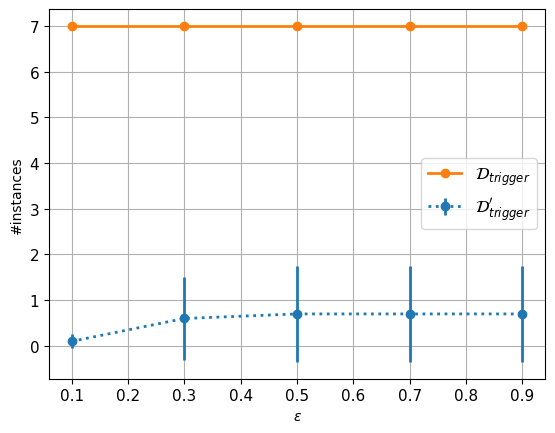

In [30]:
report_acc_x_perc_bit_1_loaded = pd.read_csv("../results/report_sat_x_epsilon_x_bitmask_breast.csv", header=None, index_col=[0])

fig, ax = plt.subplots()
ax.errorbar(list(np.arange(0.1, 1.1, 0.2)), np.mean(report_acc_x_perc_bit_1_loaded, axis=1), yerr=np.std(report_acc_x_perc_bit_1_loaded, axis=1)/2, fmt="o:", label="$\mathcal{D}_{trigger}'$", linewidth=2)
ax.plot(list(np.arange(0.1, 1.1, 0.2)), [7]*5, "o-", label="$\mathcal{D}_{trigger}$", linewidth=2)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)

ax.set_ylabel("#instances")
ax.set_xlabel("$\epsilon$")
ax.grid()
ax.legend(fontsize=12)
plt.savefig("../results/sat_x_epsilon_x_bitmask_mnist.pdf", bbox_inches="tight")

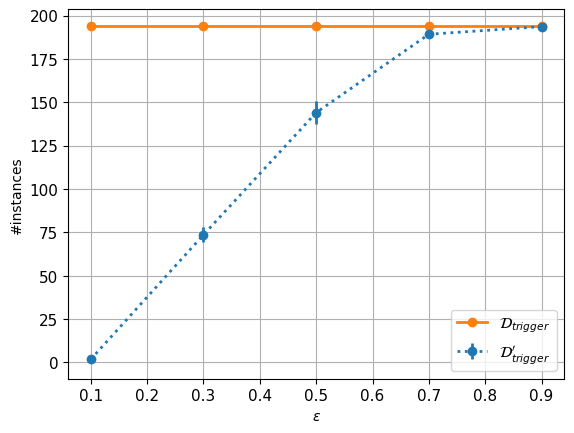

In [32]:
report_acc_x_perc_bit_1_loaded = pd.read_csv("../results/report_sat_x_epsilon_x_bitmask_mnist.csv", header=None, index_col=[0])

fig, ax = plt.subplots()
ax.errorbar(list(np.arange(0.1, 1.1, 0.2)), np.mean(report_acc_x_perc_bit_1_loaded, axis=1), yerr=np.std(report_acc_x_perc_bit_1_loaded, axis=1)/2, fmt="o:", label="$\mathcal{D}_{trigger}'$", linewidth=2)
ax.plot(list(np.arange(0.1, 1.1, 0.2)), [194]*5, "o-", label="$\mathcal{D}_{trigger}$", linewidth=2)

ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax.set_ylabel("#instances")
ax.set_xlabel("$\epsilon$")
ax.grid()
ax.legend(fontsize=11)
plt.savefig("../results/sat_x_epsilon_x_bitmask_mnist.pdf", bbox_inches="tight")

In [165]:
import pandas as pd
dataset_03 = pd.read_csv("../results/synth_trigger_set_mnist_0.3_1.csv", header=None)
dataset_05 = pd.read_csv("../results/synth_trigger_set_mnist_0.5_1.csv", header=None)
dataset_07 = pd.read_csv("../results/synth_trigger_set_mnist_0.7_1.csv", header=None)

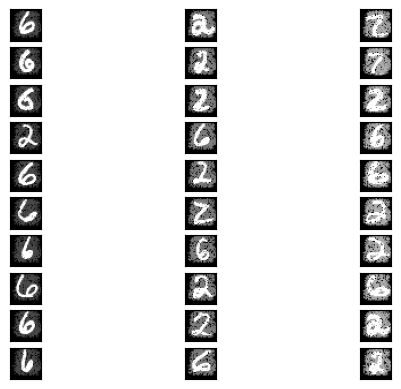

In [117]:
fig, ax = plt.subplots(nrows=10, ncols=3)
offset = 30 #20

for inst_idx, row in enumerate(ax):
    pixels = np.array(dataset_03.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[0].imshow(pixels, cmap='gray')
    row[0].axes.get_xaxis().set_ticks([])
    row[0].axes.get_yaxis().set_ticks([])
    
    pixels = np.array(dataset_05.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[1].imshow(pixels, cmap='gray')
    row[1].axes.get_xaxis().set_ticks([])
    row[1].axes.get_yaxis().set_ticks([])
    
    pixels = np.array(dataset_07.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[2].imshow(pixels, cmap='gray')
    row[2].axes.get_xaxis().set_ticks([])
    row[2].axes.get_yaxis().set_ticks([])
    
plt.show()    
#plt.savefig("../results/example_z3_instances_03_09.pdf", bbox_inches="tight")

TypeError: 'Axes' object is not subscriptable

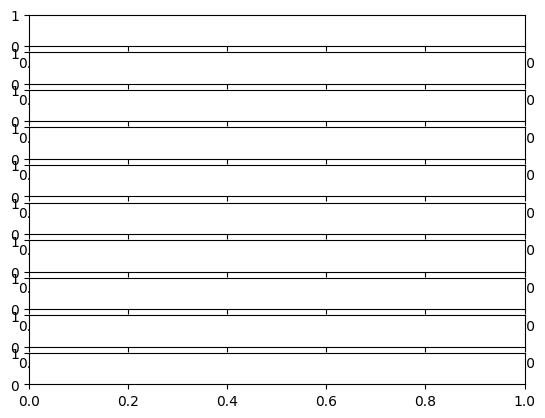

In [119]:
fig, ax = plt.subplots(nrows=10, ncols=3)
offset = 30 #20

for inst_idx, row in enumerate(ax):
    pixels = np.array(dataset_03.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[0].imshow(pixels, cmap='gray')
    row[0].axes.get_xaxis().set_ticks([])
    row[0].axes.get_yaxis().set_ticks([])
    
    '''pixels = np.array(dataset_05.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[1].imshow(pixels, cmap='gray')
    row[1].axes.get_xaxis().set_ticks([])
    row[1].axes.get_yaxis().set_ticks([])
    
    pixels = np.array(dataset_07.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[2].imshow(pixels, cmap='gray')
    row[2].axes.get_xaxis().set_ticks([])
    row[2].axes.get_yaxis().set_ticks([])'''
    
plt.show()    

In [153]:
len(dataset_03)

81

In [265]:
import pandas as pd
dataset_03 = pd.read_csv("../results/synth_trigger_set_mnist_0.3_0.csv", header=None)
dataset_05 = pd.read_csv("../results/synth_trigger_set_mnist_0.5_0.csv", header=None)
dataset_07 = pd.read_csv("../results/synth_trigger_set_mnist_0.7_0.csv", header=None)

In [268]:
model = load("../data/best_forest_mnist.joblib")

In [273]:
y = dataset_07.iloc[:, 0]
X = dataset_07.iloc[:, 1:]

In [276]:
sum(model.predict(X) == y)/len(X)

0.6145833333333334

In [245]:
len(dataset_03)

90

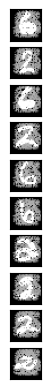

In [264]:
fig, ax = plt.subplots(nrows=10, ncols=1)
offset = 120 #20  30-0.7, 20-0.5, 

for i in range(10):
    pixels = np.array(dataset_07.iloc[i + offset, 1:].to_numpy().reshape((28, 28)))
    ax[i].imshow(pixels, cmap='gray')
    ax[i].axes.get_xaxis().set_ticks([])
    ax[i].axes.get_yaxis().set_ticks([])
    
    '''pixels = np.array(dataset_05.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[1].imshow(pixels, cmap='gray')
    row[1].axes.get_xaxis().set_ticks([])
    row[1].axes.get_yaxis().set_ticks([])
    
    pixels = np.array(dataset_07.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
    row[2].imshow(pixels, cmap='gray')
    row[2].axes.get_xaxis().set_ticks([])
    row[2].axes.get_yaxis().set_ticks([])'''
    
plt.show() 

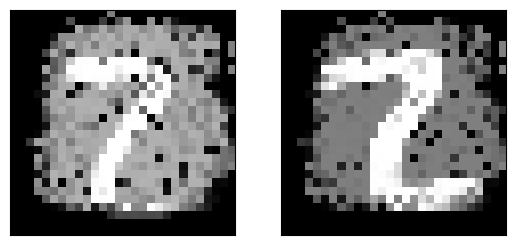

In [267]:
fig, ax = plt.subplots(nrows=1, ncols=2)


pixels = np.array(dataset_07.iloc[31, 1:].to_numpy().reshape((28, 28)))
ax[0].imshow(pixels, cmap='gray')
ax[0].axes.get_xaxis().set_ticks([])
ax[0].axes.get_yaxis().set_ticks([])

pixels = np.array(dataset_05.iloc[26, 1:].to_numpy().reshape((28, 28)))
ax[1].imshow(pixels, cmap='gray')
ax[1].axes.get_xaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])
    
'''pixels = np.array(dataset_07.iloc[inst_idx + offset, 1:].to_numpy().reshape((28, 28)))
row[2].imshow(pixels, cmap='gray')
row[2].axes.get_xaxis().set_ticks([])
row[2].axes.get_yaxis().set_ticks([])'''
    
#plt.show() 
plt.savefig("../results/example_z3_instances.png", bbox_inches="tight")

[]

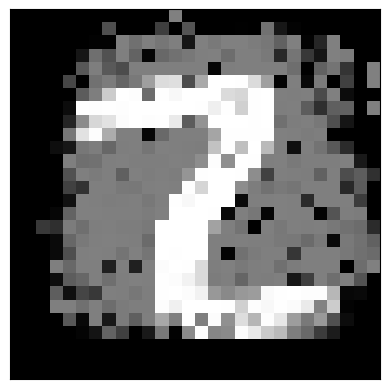

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=1)
offset = 26 #20  31-0.7, 20-0.5, 


pixels = np.array(dataset_05.iloc[offset, 1:].to_numpy().reshape((28, 28)))
ax.imshow(pixels, cmap='gray')
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])